<a href="https://colab.research.google.com/github/ed-roberts-github/Previous-work/blob/main/polynomial_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Polynomial Regression

Looking whether to hire a person who wants £160k with 6.5 years experience.

## Importing the libraries

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Importing the dataset

In [7]:
dataset = pd.read_csv('Position_Salaries.csv')
X = dataset.iloc[:, 1:-1].values #only getting the 'level' collumn
y = dataset.iloc[:, -1].values

Not splitting into test and training data because only want to predict 1 value within the range and don't have a large data set so want to use as much training data as possible.

## Training the Linear Regression model on the whole dataset

In [8]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

## Training the Polynomial Regression model on the whole dataset

In [12]:
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree = 4)
X_poly = poly_reg.fit_transform(X) #matrix of features composed of positions levels and x powers
lin_reg_2 = LinearRegression()
lin_reg_2.fit(X_poly, y) #now you have the poly model

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

## Visualising the Linear Regression results

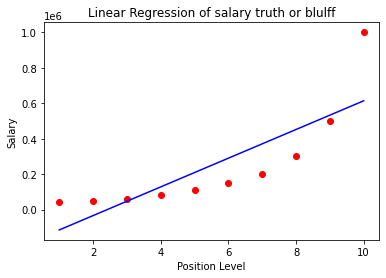

In [10]:
plt.scatter(X,y, color = 'red')
plt.plot(X, lin_reg.predict(X),color = 'blue') #plotting the linear reg model
plt.title("Linear Regression of salary truth or blulff")
plt.xlabel("Position Level")
plt.ylabel("Salary")
plt.show()

Can easily see the linear model isn't a good fit to this data

## Visualising the Polynomial Regression results

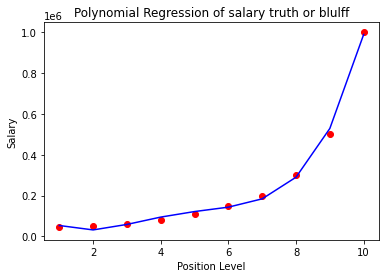

In [13]:
plt.scatter(X,y, color = 'red')
plt.plot(X, lin_reg_2.predict(poly_reg.fit_transform(X)),color = 'blue') #plotting the poly reg model but need to predict 
#not just the x values but with the x and x^2 etc
plt.title("Polynomial Regression of salary truth or blulff")
plt.xlabel("Position Level")
plt.ylabel("Salary")
plt.show()

## Visualising the Polynomial Regression results (for higher resolution and smoother curve)

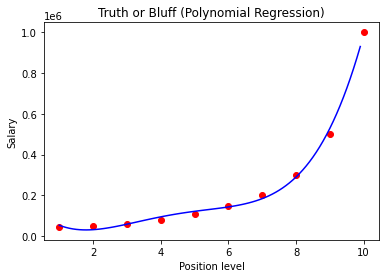

In [14]:
X_grid = np.arange(min(X), max(X), 0.1) #the 0.1 increases the incriment to smooth line
X_grid = X_grid.reshape((len(X_grid), 1))
plt.scatter(X, y, color = 'red')
plt.plot(X_grid, lin_reg_2.predict(poly_reg.fit_transform(X_grid)), color = 'blue')
plt.title('Truth or Bluff (Polynomial Regression)')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()

This model is pretty much over fitted

## Predicting a new result with Linear Regression

In [16]:
print(lin_reg.predict([[6.5]])) #predicting the salary of someone with 6.5 years experience
      #remember we need to input a 2D array into predict

[330378.78787879]


So in the example gievn when someone asked for a £160000 salary this model would predict they can actually have a much bigger salary

## Predicting a new result with Polynomial Regression

In [18]:
print(lin_reg_2.predict(poly_reg.fit_transform([[6.5]]))) #need to input all the x powers into the array

[158862.45265155]


This is close to the person's asking salary so good to hire them.